In [1]:
# import 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import myutils

%matplotlib inline

In [2]:
# fast.ai import
from fastai.imports import *
from fastai.structured import *

In [3]:
from sklearn.ensemble import RandomForestRegressor

In [4]:
path='../../../datasets/bulldozers/'

In [5]:
!head -3 {path}Train.csv

SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
1139246,66000,999089,3157,121,3,2004,68,Low,11/16/2006 0:00,521D,521,D,,,,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,,EROPS w AC,None or Unspecified,,None or Unspecified,,,,,,,,2 Valve,,,,,None or Unspecified,None or Unspecified,,,,,,,,,,,,,Standard,Conventional
1139248,57000,117657,77,121,3,1996,4640,Lo

In [6]:
# Reading the data
df_raw = pd.read_feather('tmp/raw')
len(df_raw.columns)

65

In [7]:
myutils.display_df(myutils.df_null(df_raw))

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    258360
UsageBand                   331486
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             137191
fiModelSeries               344217
fiModelDescriptor           329206
ProductSize                 210775
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                296764
Enclosure                      325
Forks                       209048
Pad_Type                    321991
Ride_Control                252519
Stick                       321991
Transmission                217895
Turbocharged                321991
Blade_Extension             375906
Blade_Width         

In [8]:
df, y, miss_dict = proc_df(df_raw, 'SalePrice')

In [9]:
len(df.columns)

66

In [10]:
df.columns, df_raw.columns

(Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
        'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
        'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries', 'fiModelDescriptor',
        'ProductSize', 'fiProductClassDesc', 'state', 'ProductGroup',
        'ProductGroupDesc', 'Drive_System', 'Enclosure', 'Forks', 'Pad_Type',
        'Ride_Control', 'Stick', 'Transmission', 'Turbocharged',
        'Blade_Extension', 'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower',
        'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control',
        'Tire_Size', 'Coupler', 'Coupler_System', 'Grouser_Tracks',
        'Hydraulics_Flow', 'Track_Type', 'Undercarriage_Pad_Width',
        'Stick_Length', 'Thumb', 'Pattern_Changer', 'Grouser_Type',
        'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
        'Differential_Type', 'Steering_Controls', 'saleYear', 'saleMonth',
        'saleWeek', 'saleDay', 'saleDayofweek', 'saleDayofyear',

In [11]:
clf = RandomForestRegressor(n_jobs=-1)
clf.fit(df, y)
clf.score(df, y)  #return r2 score

0.9830949696885208

In [12]:
??clf.score

Signature: clf.score(X, y, sample_weight=None)
Source:   
    def score(self, X, y, sample_weight=None):
        """Returns the coefficient of determination R^2 of the prediction.

        The coefficient R^2 is defined as (1 - u/v), where u is the residual
        sum of squares ((y_true - y_pred) ** 2).sum() and v is the total
        sum of squares ((y_true - y_true.mean()) ** 2).sum().
        The best possible score is 1.0 and it can be negative (because the
        model can be arbitrarily worse). A constant model that always
        predicts the expected value of y, disregarding the input features,
        would get a R^2 score of 0.0.

        Parameters
        ----------
        X : array-like, shape = (n_samples, n_features)
            Test samples.

        y : array-like, shape = (n_samples) or (n_samples, n_outputs)
            True values for X.

        sample_weight : array-like, shape = [n_samples], optional
            Sample weights.

        Returns
        ------

In [13]:
X_train, X_test, y_train, y_test = myutils.split_vals_no(df, y, 14000)

(387125, 66) (14000, 66)
(387125,) (14000,)


In [14]:
clf2 = RandomForestRegressor(n_jobs=-1)
%time clf2.fit(X_train, y_train)
clf2.score(X_train, y_train)

CPU times: user 1min 13s, sys: 377 ms, total: 1min 14s
Wall time: 22.5 s


0.9827919711818245

In [15]:
clf2.score(X_test, y_test)

0.87840312512985

In [16]:
myutils.print_score(clf2, X_train, y_train, X_test, y_test)

training rmse, validation rmse, training score, validation score and/or oob_score
[0.09074184304152885, 0.25921398682157576, 0.9827919711818245, 0.87840312512985]


### For speeding the model, lets train it on sampled data

In [17]:
len(df_raw.columns)

65

In [28]:
df_trn, y_trn, _ = proc_df(df_raw, 'SalePrice', subset=30000)
X_trn, _, y_trn, _ = myutils.split_vals_no(df_trn, y_trn, 10000)

(20000, 65) (10000, 65)
(20000,) (10000,)


In [19]:
len(df_raw.columns)

65

In [20]:
clf3 = RandomForestRegressor(n_jobs=-1)
%time clf3.fit(X_trn, y_trn)
myutils.print_score(clf3, X_trn, y_trn, X_test.drop('auctioneerID_na', axis=1), y_test)

CPU times: user 1.46 s, sys: 3.96 ms, total: 1.47 s
Wall time: 446 ms
training rmse, validation rmse, training score, validation score and/or oob_score
[0.11058796982558232, 0.3529469066243972, 0.9745917202668072, 0.7745634602889973]


### Bulding a small tree

In [21]:
clf4 = RandomForestRegressor(n_jobs=-1, n_estimators=1, bootstrap=False, max_depth=3)
%time clf4.fit(X_trn, y_trn)
myutils.print_score(clf4, X_trn, y_trn, X_test.drop('auctioneerID_na', axis=1), y_test)

CPU times: user 91.3 ms, sys: 39 µs, total: 91.3 ms
Wall time: 162 ms
training rmse, validation rmse, training score, validation score and/or oob_score
[0.48844248359385795, 0.5317185844483021, 0.5043371689075458, 0.4883544164905186]


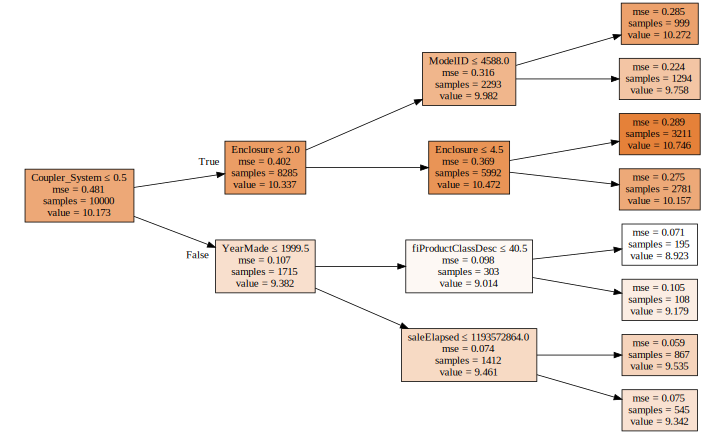

In [22]:
draw_tree(clf4.estimators_[0], df_trn, precision=3)

In [23]:
??draw_tree

Signature: draw_tree(t, df, size=10, ratio=0.6, precision=0)
Source:   
def draw_tree(t, df, size=10, ratio=0.6, precision=0):
    """ Draws a representation of a random forest in IPython.

    Parameters:
    -----------
    t: The tree you wish to draw
    df: The data used to train the tree. This is used to get the names of the features.
    """
    s=export_graphviz(t, out_file=None, feature_names=df.columns, filled=True,
                      special_characters=True, rotate=True, precision=precision)
    IPython.display.display(graphviz.Source(re.sub('Tree {',
       f'Tree {{ size={size}; ratio={ratio}', s)))
File:      ~/anaconda/envs/gpu/lib/python3.6/site-packages/fastai/structured.py
Type:      function


#### Let's see what happen if we create bigger tree

In [24]:
clf5 = RandomForestRegressor(n_jobs=-1, n_estimators=1, bootstrap=False)
%time clf5.fit(X_trn, y_trn)
myutils.print_score(clf5, X_trn, y_trn, X_test.drop('auctioneerID_na', axis=1), y_test)

CPU times: user 194 ms, sys: 3.93 ms, total: 198 ms
Wall time: 244 ms
training rmse, validation rmse, training score, validation score and/or oob_score
[9.729507111180988e-17, 0.47453706286422614, 1.0, 0.5924829107239453]


### Bagging  
n_estimators = no of trees created by sklearn, default is 10.

In [29]:
clf = RandomForestRegressor(n_jobs=-1)
%time clf.fit(X_trn, y_trn)
myutils.print_score(clf, X_trn, y_trn, X_test.drop('auctioneerID_na', axis=1), y_test)

CPU times: user 3.45 s, sys: 3.98 ms, total: 3.46 s
Wall time: 1.09 s
training rmse, validation rmse, training score, validation score and/or oob_score
[0.10397557653477098, 0.3340223881008198, 0.978145166243663, 0.7980905232586694]


Grabbing each tree

In [35]:
preds = np.stack([t.predict(X_test.drop('auctioneerID_na', axis=1)) for t in clf.estimators_])
preds.shape

(10, 14000)

In [39]:
preds[:, 0]

array([11.07442, 10.98529, 11.17044, 10.9682 , 11.3621 , 11.08214, 11.17044, 10.859  , 11.3621 , 11.26446])

In [38]:
np.mean(preds[:, 0], axis=0)

11.129859262983155

In [40]:
y_test[0]

11.302204433654575

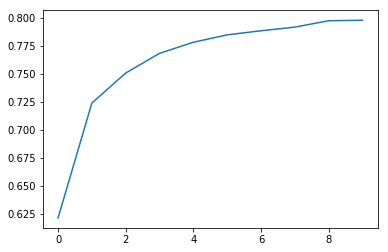

In [52]:
plt.plot([metrics.r2_score(y_test, np.mean(preds[:i+1, :], axis=0)) for i in range(10)])

#### What if we increase the estimators

In [53]:
clf = RandomForestRegressor(n_jobs=-1, n_estimators=20)
%time clf.fit(X_trn, y_trn)
myutils.print_score(clf, X_trn, y_trn, X_test.drop('auctioneerID_na', axis=1), y_test)

CPU times: user 7.44 s, sys: 19.2 ms, total: 7.46 s
Wall time: 2.1 s
training rmse, validation rmse, training score, validation score and/or oob_score
[0.09432671324844437, 0.3302315618612052, 0.9820131862788136, 0.8026474660204654]


In [54]:
clf = RandomForestRegressor(n_jobs=-1, n_estimators=40)
%time clf.fit(X_trn, y_trn)
myutils.print_score(clf, X_trn, y_trn, X_test.drop('auctioneerID_na', axis=1), y_test)

CPU times: user 14.7 s, sys: 218 ms, total: 14.9 s
Wall time: 4.42 s
training rmse, validation rmse, training score, validation score and/or oob_score
[0.08966885472046672, 0.3230827341928455, 0.9837457072037205, 0.8110995254006317]


### OOB Validation and Score

In [56]:
clf = RandomForestRegressor(n_jobs=-1, n_estimators=40, oob_score=True)
%time clf.fit(X_trn, y_trn)
myutils.print_score(clf, X_trn, y_trn, X_test.drop('auctioneerID_na', axis=1), y_test)

CPU times: user 15.1 s, sys: 23.6 ms, total: 15.1 s
Wall time: 4.19 s
training rmse, validation rmse, training score, validation score and/or oob_score
[0.08917457287176132, 0.32273507790362826, 0.9839244104656788, 0.8115058430236685, 0.8837785131220879]


### Sampling the data from whole dataset for each estimator tree

In [59]:
set_rf_samples(20000)  # written in fastai.structure source code
# reset_rf_samples()   # resetting the setting

In [60]:
clf = RandomForestRegressor(n_jobs=-1, n_estimators=40, oob_score=True)
%time clf.fit(X_trn, y_trn)
myutils.print_score(clf, X_trn, y_trn, X_vld, y_vld)

CPU times: user 33.6 s, sys: 1.05 s, total: 34.6 s
Wall time: 13.6 s
training rmse, validation rmse, training score, validation score and/or oob_score
[0.22721361933661924, 0.26434145282799687, 0.8924109203714102, 0.8679605720768679, 0.8809702095879127]


In [61]:
reset_rf_samples()

### Baseline model

In [62]:
clf = RandomForestRegressor(n_jobs=-1, n_estimators=40, oob_score=True)
%time clf.fit(X_trn, y_trn)
myutils.print_score(clf, X_trn, y_trn, X_vld, y_vld)

CPU times: user 6min 32s, sys: 1.41 s, total: 6min 33s
Wall time: 1min 46s
training rmse, validation rmse, training score, validation score and/or oob_score
[0.07845117165982682, 0.23590862940114493, 0.9871737901501871, 0.8948375383045322, 0.9085396915671635]


In [63]:
clf = RandomForestRegressor(n_jobs=-1, n_estimators=40, min_samples_leaf=3, oob_score=True)
%time clf.fit(X_trn, y_trn)
myutils.print_score(clf, X_trn, y_trn, X_vld, y_vld)

CPU times: user 5min 23s, sys: 1.12 s, total: 5min 25s
Wall time: 1min 29s
training rmse, validation rmse, training score, validation score and/or oob_score
[0.11503581312021541, 0.23263470443124137, 0.9724218197295229, 0.8977361602406334, 0.9087724727008559]


In [64]:
clf = RandomForestRegressor(n_jobs=-1, n_estimators=40, min_samples_leaf=3, max_features=0.5, oob_score=True)
%time clf.fit(X_trn, y_trn)
myutils.print_score(clf, X_trn, y_trn, X_vld, y_vld)

CPU times: user 2min 50s, sys: 922 ms, total: 2min 51s
Wall time: 50.4 s
training rmse, validation rmse, training score, validation score and/or oob_score
[0.11914486306226807, 0.22652251332877205, 0.9704164615749635, 0.903039279927403, 0.9120598731073165]
